In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


###Accesing data from google Drive and reading the AWID3 ("readytogo") selecting 150K rows out of total 1.7M rows

In [ ]:
pf= pd.read_csv(r"./gdrive/My Drive/GAF and TL based WINDS/NZVAR_labeledandclean_TRAIN_withcol21_20_binary.csv")

In [ ]:
pf=pf[['frame.len', 'frame.time_delta', 'frame.time_delta_displayed',
       'frame.time_epoch', 'frame.time_relative', 'radiotap.channel.freq',
       'radiotap.datarate', 'radiotap.dbm_antsignal', 'radiotap.length',
       'radiotap.present.tsft', 'wlan.bssid', 'wlan.da', 'wlan.duration',
       'wlan.fc.ds', 'wlan.fc.frag', 'wlan.fc.moredata', 'wlan.fc.protected',
       'wlan.fc.pwrmgt', 'wlan.fc.retry', 'wlan.fc.subtype', 'wlan.fc.type',
       'wlan.ra', 'wlan.sa', 'wlan.seq', 'wlan.ta', 'attack_map']].copy()

In [ ]:
df = pf.iloc[:1000000,]


In [ ]:
df['attack_map'].value_counts()

0    954784
1     45216
Name: attack_map, dtype: int64

In [ ]:
#This code just help us to display all rows and columns in 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df.shape

(1000000, 26)

###Splitting Data into X and Y and then further in `X_train`, `Y_train` and `X_test`, `Y_test` and then applying `MinMaxScaler` to normalize data (`MinMaxScaler` also convert dataframe into `Numpy.ndaray` so we dont have to convert `X_train` and `X_test` into array before apply Gramian Angular Fields (GAF) we only have to convery `Y_train` and `Y_test`.

In [ ]:
sns.set_style('whitegrid')

import scipy
import warnings

warnings.filterwarnings('ignore')

In [ ]:
X = df.drop('attack_map', axis=1)
y = df['attack_map']

print('Shape of X = ', X.shape)
print('Shape of y = ', y.shape)

Shape of X =  (1000000, 25)
Shape of y =  (1000000,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)

print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (800000, 25)
Shape of y_train =  (800000,)
Shape of X_test =  (200000, 25)
Shape of y_test =  (200000,)


In [ ]:
y_test.value_counts()

0    191035
1      8965
Name: attack_map, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()

In [ ]:
sc.fit(X_train)
X_Train = sc.transform(X_train)
X_Test = sc.transform(X_test)

###Downloading `pyts` pakage for applying GAF to convert each row into image.

In [ ]:
pip install pyts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.5 MB 6.6 MB/s 


In [ ]:
from pyts.image import GramianAngularField
import matplotlib.pyplot as plt

#Xtrain, Xtest = get_some_data() # both N x T time series samples

gaf = GramianAngularField(image_size=28)

In [ ]:
from pyts.image import GramianAngularField
import matplotlib.pyplot as plt

#Xtrain, Xtest = get_some_data() # both N x T time series samples

gaf = GramianAngularField(image_size=25)
X_train = gaf.fit_transform(X_Train)
X_test = gaf.fit_transform(X_Test)
#im_test = gaf.transform(X_test)

# plot one image
#plt.imshow(X_img[0])
#plt.show()


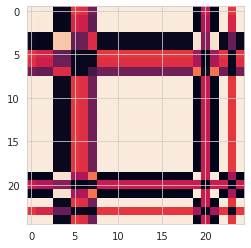

In [ ]:
plt.imshow(X_test[0])
plt.show()

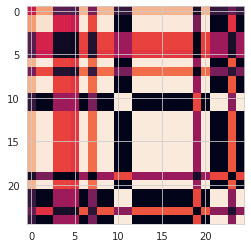

In [ ]:
plt.imshow(X_train[0])
plt.show()

In [ ]:
y_test = y_test.to_numpy()

In [ ]:
y_train = y_train.to_numpy()

In [ ]:
type(y_test)

numpy.ndarray

#Modelling CNN

###Image shape and columns are set to 25.

In [ ]:
image_rows = 25
image_cols = 25

image_shape = (image_rows,image_cols,1)

In [ ]:
X_train = X_train.reshape(X_train.shape[0],*image_shape)
X_test = X_test.reshape(X_test.shape[0],*image_shape)

### Building model

In [ ]:
cnn_model = Sequential([
    Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = image_shape),
    MaxPooling2D(pool_size=2) ,
    Dropout(0.2),
    Flatten(), # flatten out the layers
    Dense(32,activation='relu'),
    Dense(10,activation = 'softmax')
    
])

In [ ]:
#Using adam optimizer
from tensorflow.keras.optimizers import Adam

In [ ]:
#compiling the model
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

##Fitting the model and training it for 10 epochs

In [ ]:
history = cnn_model.fit(
    X_train,
    y_train,
    epochs=10,
    verbose=1,
    validation_data=(X_test,y_test),
)

Epoch 1/10
25000/25000 [==============================] - 442s 18ms/step - loss: 0.0050 - accuracy: 0.9985 - val_loss: 0.0013 - val_accuracy: 0.9997
Epoch 2/10
25000/25000 [==============================] - 431s 17ms/step - loss: 0.0019 - accuracy: 0.9995 - val_loss: 8.2833e-04 - val_accuracy: 0.9998
Epoch 3/10
25000/25000 [==============================] - 429s 17ms/step - loss: 0.0014 - accuracy: 0.9996 - val_loss: 6.7456e-04 - val_accuracy: 0.9998
Epoch 4/10
25000/25000 [==============================] - 403s 16ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 6.5415e-04 - val_accuracy: 0.9998
Epoch 5/10
25000/25000 [==============================] - 395s 16ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 7.4881e-04 - val_accuracy: 0.9999
Epoch 6/10
25000/25000 [==============================] - 394s 16ms/step - loss: 0.0010 - accuracy: 0.9997 - val_loss: 5.9330e-04 - val_accuracy: 0.9998
Epoch 7/10
25000/25000 [==============================] - 391s 16ms/step - loss: 0.001

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix

In [ ]:
y_predict=cnn_model.predict(X_test)
y_true=y_test

In [ ]:
y_true[20]

1

In [ ]:
y_predict[20]

array([1.4854424e-05, 9.9998510e-01, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00], dtype=float32)

In [ ]:
rounded_prediction = np.argmax(y_predict, axis=-1)

In [ ]:
rounded_prediction[0]

0

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, rounded_prediction)

In [ ]:
cm

array([[191018,     17],
       [     4,   8961]])

In [ ]:
cm = confusion_matrix(y_true=y_test, y_pred=rounded_prediction)

In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
   

In [ ]:
cm_plot_labels = ['Normal','Attack']


In [ ]:
import itertools

Confusion matrix, without normalization
[[191018     17]
 [     4   8961]]


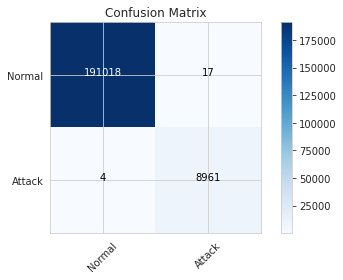

In [ ]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')


In [ ]:
import sklearn.metrics

y_true = y_true
y_pred = rounded_prediction

precision = sklearn.metrics.precision_score(y_true, y_pred, pos_label=1)
print(precision)

0.9981064825128091


In [ ]:
recall = sklearn.metrics.recall_score(y_true, y_pred, pos_label=1)
print(recall)

0.9995538204127161


In [ ]:
acc = sklearn.metrics.accuracy_score(y_true, y_pred)

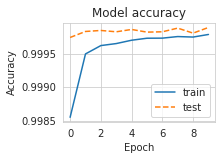

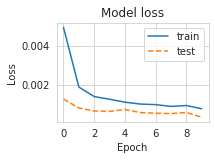

In [ ]:
plt.subplot(222)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'], linestyle='dashed')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='bottom left')
plt.show()
plt.subplot(222)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],linestyle='dashed')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

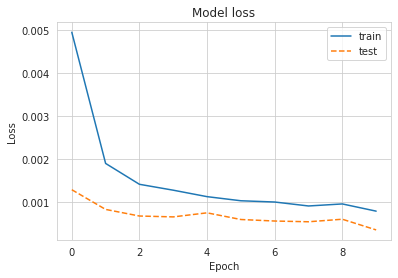

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],linestyle='dashed')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

##Saving and Downloading the model

In [ ]:
import os.path
if os.path.isfile('models/tf_trail_10.h5') is False:
  cnn_model.save('models/tf_trail_10.h5')

In [ ]:
pf= pd.read_csv(r"./gdrive/My Drive/GAF and TL based WINDS/NZVAR_labeledandclean_TRAIN_withcol21_20_binary.csv")

In [ ]:
pf=pf[['frame.len', 'frame.time_delta', 'frame.time_delta_displayed',
       'frame.time_epoch', 'frame.time_relative', 'radiotap.channel.freq',
       'radiotap.datarate', 'radiotap.dbm_antsignal', 'radiotap.length',
       'radiotap.present.tsft', 'wlan.bssid', 'wlan.da', 'wlan.duration',
       'wlan.fc.ds', 'wlan.fc.frag', 'wlan.fc.moredata', 'wlan.fc.protected',
       'wlan.fc.pwrmgt', 'wlan.fc.retry', 'wlan.fc.subtype', 'wlan.fc.type',
       'wlan.ra', 'wlan.sa', 'wlan.seq', 'wlan.ta', 'attack_map']].copy()

In [ ]:
X = pf.drop('attack_map', axis=1)
y = pf['attack_map']

print('Shape of X = ', X.shape)
print('Shape of y = ', y.shape)

Shape of X =  (1794794, 25)
Shape of y =  (1794794,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)

print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (1435835, 25)
Shape of y_train =  (1435835,)
Shape of X_test =  (358959, 25)
Shape of y_test =  (358959,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()

In [ ]:
sc.fit(X_train)
X_Train = sc.transform(X_train)
X_Test = sc.transform(X_test)

In [ ]:
from pyts.image import GramianAngularField
import matplotlib.pyplot as plt

#Xtrain, Xtest = get_some_data() # both N x T time series samples

gaf = GramianAngularField(image_size=25)
X_train = gaf.fit_transform(X_Train)
X_test = gaf.fit_transform(X_Test)
#im_test = gaf.transform(X_test)

# plot one image
#plt.imshow(X_img[0])
#plt.show()

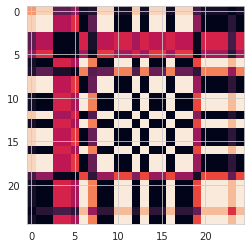

In [ ]:
plt.imshow(X_test[0])
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model_t_7 = load_model('models/tf_trail_7.h5')

In [ ]:

model_t_7.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 23, 23, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 flatten (Flatten)           (None, 3872)              0         
                                                                 
 dense (Dense)               (None, 32)                123936    
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                        

In [ ]:
mo =Sequential()
for layer in model_t_7.layers[:-1]:
  mo.add(layer)

In [ ]:
  layer.trainable=False

In [ ]:
mo.add(Dense(10,activation = 'softmax'))

In [ ]:
mo.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [ ]:
mo.build(X_train.shape)

In [ ]:
mo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 23, 23, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 flatten (Flatten)           (None, 3872)              0         
                                                                 
 dense (Dense)               (None, 32)                123936    
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                      

In [ ]:
history = mo.fit(
    X_train,
    y_train,
    epochs=4,
    verbose=1,
    validation_data=(X_test,y_test),
)

#Reshaping data


In [ ]:
#X_test.shape


(90861, 25, 25)

In [ ]:
#X_test = X_test.reshape((X_test.shape[0], 1, -1))
#X_test.shape

(90861, 1, 625)

In [ ]:
# load in MNIST dataset
#/(
    #(train_images, train_labels),
   # (test_images, test_labels),
#) = tf.keras.datasets.mnist.load_data()

# flatten images and add time dimension
#train_images = train_images.reshape((train_images.shape[0], 1, -1))
#train_labels = train_labels.reshape((train_labels.shape[0], 1, -1))
#test_images = test_images.reshape((test_images.shape[0], 1, -1))
#test_labels = test_labels.reshape((test_labels.shape[0], 1, -1))

In [ ]:
#train_images.shape

(60000, 1, 784)

##Developing SNN

In [ ]:
!pip install nengo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 535 kB 13.9 MB/s 


In [ ]:
!pip install nengo_dl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 289 kB 10.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for nengo-dl: filename=nengo_dl-3.5.0-py3-none-any.whl size=206240 sha256=07b24cef1823fca4ab783d886f55255caa0a6cb0b7745a24436129e8e1e422af
  Stored in directory: /root/.cache/pip/wheels/c2/a1/ab/4788317a80cbd5a999e6f70037ceadf2ce4c57e0bcf5842c2a
Successfully built nengo-dl
  Attempting uninstall: progressbar2
    Found existing installation: progressbar2 3.38.0
    Uninstalling progressbar2-3.38.0:
      Successfully uninstalled progressbar2-3.38.0


In [ ]:
!pip install nengo_loihi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 189 kB 14.1 MB/s 


In [ ]:
import collections
import warnings

%matplotlib inline
import matplotlib.pyplot as plt
import nengo
import nengo_dl
import numpy as np
import tensorflow as tf

import nengo_loihi

# ignore NengoDL warning about no GPU
warnings.filterwarnings("ignore", message="No GPU", module="nengo_dl")

# The results in this notebook should be reproducible across many random seeds.
# However, some seed values may cause problems, particularly in the `to-spikes` layer
# where poor initialization can result in no information being sent to the chip. We set
# the seed to ensure that good results are reproducible without having to re-train.
np.random.seed(0)
tf.random.set_seed(0)

In [ ]:
# flatten images and add time dimension
train_images = X_train.reshape((X_train.shape[0], 1, -1))
train_labels = y_train.reshape((y_train.shape[0], 1, -1))
test_images = X_test.reshape((X_test.shape[0], 1, -1))
test_labels = y_test.reshape((y_test.shape[0], 1, -1))

In [ ]:
inp = tf.keras.Input(shape=(25, 25, 1), name="input")

# transform input signal to spikes using trainable 1x1 convolutional layer
to_spikes_layer = tf.keras.layers.Conv2D(
    filters=5,  # 3 neurons per pixel
    kernel_size=1,
    strides=1,
    activation=tf.nn.relu,
    use_bias=False,
    name="to-spikes",
)
to_spikes = to_spikes_layer(inp)

# on-chip convolutional layers
conv0_layer = tf.keras.layers.Conv2D(
    filters=32,
    kernel_size=3,
    strides=2,
    activation=tf.nn.relu,
    use_bias=False,
    name="conv0",
)
conv0 = conv0_layer(to_spikes)

conv1_layer = tf.keras.layers.Conv2D(
    filters=64,
    kernel_size=3,
    strides=2,
    activation=tf.nn.relu,
    use_bias=False,
    name="conv1",
)
conv1 = conv1_layer(conv0)

flatten = tf.keras.layers.Flatten(name="flatten")(conv1)

dense0_layer = tf.keras.layers.Dense(units=100, activation=tf.nn.relu, name="dense0")
dense0 = dense0_layer(flatten)

# since this final output layer has no activation function,
# it will be converted to a `nengo.Node` and run off-chip
dense1 = tf.keras.layers.Dense(units=10, name="dense1")(dense0)

model = tf.keras.Model(inputs=inp, outputs=dense1)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 25, 25, 1)]       0         
                                                                 
 to-spikes (Conv2D)          (None, 25, 25, 5)         5         
                                                                 
 conv0 (Conv2D)              (None, 12, 12, 32)        1440      
                                                                 
 conv1 (Conv2D)              (None, 5, 5, 64)          18432     
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense0 (Dense)              (None, 100)               160100    
                                                                 
 dense1 (Dense)              (None, 10)                1010  

In [ ]:
def train(params_file="./keras_to_loihi_params", epochs=1, **kwargs):
    converter = nengo_dl.Converter(model, **kwargs)

    with nengo_dl.Simulator(converter.net, seed=0) as sim:
        sim.compile(
            optimizer=tf.optimizers.RMSprop(0.001),
            loss={
                converter.outputs[dense1]: tf.losses.SparseCategoricalCrossentropy(
                    from_logits=True
                )
            },
            metrics={converter.outputs[dense1]: tf.metrics.sparse_categorical_accuracy},
        )
        sim.fit(
            {converter.inputs[inp]: train_images},
            {converter.outputs[dense1]: train_labels},
            epochs=epochs,
        )

        # save the parameters to file
        sim.save_params(params_file)

In [ ]:
# train this network with normal ReLU neurons
train(
    epochs=1,
    swap_activations={tf.nn.relu: nengo.RectifiedLinear()},
)

Build finished in 0:00:00                                                      
Optimization finished in 0:00:00                                               
Construction finished in 0:00:00                                               
363442/363442 [==============================] - 3055s 8ms/step - loss: 0.1394 - probe_loss: 0.1394 - probe_sparse_categorical_accuracy: 0.9793


In [ ]:
def run_network(
    activation,
    params_file="./keras_to_loihi_params",
    n_steps=30,
    scale_firing_rates=1,
    synapse=None,
    n_test=100,
    n_plots=2,
):
    # convert the keras model to a nengo network
    nengo_converter = nengo_dl.Converter(
        model,
        scale_firing_rates=scale_firing_rates,
        swap_activations={tf.nn.relu: activation},
        synapse=synapse,
    )

    # get input/output objects
    nengo_input = nengo_converter.inputs[inp]
    nengo_output = nengo_converter.outputs[dense1]

    # add probes to layers to record activity
    with nengo_converter.net:
        probes = collections.OrderedDict(
            [
                [to_spikes_layer, nengo.Probe(nengo_converter.layers[to_spikes])],
                [conv0_layer, nengo.Probe(nengo_converter.layers[conv0])],
                [conv1_layer, nengo.Probe(nengo_converter.layers[conv1])],
                [dense0_layer, nengo.Probe(nengo_converter.layers[dense0])],
            ]
        )

    # repeat inputs for some number of timesteps
    tiled_test_images = np.tile(test_images[:n_test], (1, n_steps, 1))

    # set some options to speed up simulation
    with nengo_converter.net:
        nengo_dl.configure_settings(stateful=False)

    # build network, load in trained weights, run inference on test images
    with nengo_dl.Simulator(
        nengo_converter.net, minibatch_size=20, progress_bar=False
    ) as nengo_sim:
        nengo_sim.load_params(params_file)
        data = nengo_sim.predict({nengo_input: tiled_test_images})

    # compute accuracy on test data, using output of network on
    # last timestep
    test_predictions = np.argmax(data[nengo_output][:, -1], axis=-1)
    print(
        "Test accuracy: %.2f%%"
        % (100 * np.mean(test_predictions == test_labels[:n_test, 0, 0]))
    )

    # plot the results
    mean_rates = []
    for i in range(n_plots):
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 3, 1)
        plt.title("Input image")
        plt.imshow(test_images[i, 0].reshape((25, 25)), cmap="gray")
        plt.axis("off")

        n_layers = len(probes)
        mean_rates_i = []
        for j, layer in enumerate(probes.keys()):
            probe = probes[layer]
            plt.subplot(n_layers, 3, (j * 3) + 2)
            plt.suptitle("Neural activities")

            outputs = data[probe][i]

            # look at only at non-zero outputs
            nonzero = (outputs > 0).any(axis=0)
            outputs = outputs[:, nonzero] if sum(nonzero) > 0 else outputs

            # undo neuron amplitude to get real firing rates
            outputs /= nengo_converter.layers[layer].ensemble.neuron_type.amplitude

            rates = outputs.mean(axis=0)
            mean_rate = rates.mean()
            mean_rates_i.append(mean_rate)
            print(
                '"%s" mean firing rate (example %d): %0.1f' % (layer.name, i, mean_rate)
            )

            if is_spiking_type(activation):
                outputs *= 0.001
                plt.ylabel("# of Spikes")
            else:
                plt.ylabel("Firing rates (Hz)")

            # plot outputs of first 100 neurons
            plt.plot(outputs[:, :100])

        mean_rates.append(mean_rates_i)

        plt.xlabel("Timestep")

        plt.subplot(1, 3, 3)
        plt.title("Output predictions")
        plt.plot(tf.nn.softmax(data[nengo_output][i]))
        plt.legend([str(j) for j in range(10)], loc="upper left")
        plt.xlabel("Timestep")
        plt.ylabel("Probability")

        plt.tight_layout()

    # take mean rates across all plotted examples
    mean_rates = np.array(mean_rates).mean(axis=0)

    return mean_rates


def is_spiking_type(neuron_type):
    return isinstance(neuron_type, (nengo.LIF, nengo.SpikingRectifiedLinear))

Test accuracy: 95.00%
"to-spikes" mean firing rate (example 0): 0.0
"conv0" mean firing rate (example 0): 0.1
"conv1" mean firing rate (example 0): 0.1
"dense0" mean firing rate (example 0): 5.8
"to-spikes" mean firing rate (example 1): 0.0
"conv0" mean firing rate (example 1): 0.1
"conv1" mean firing rate (example 1): 0.1
"dense0" mean firing rate (example 1): 2.2


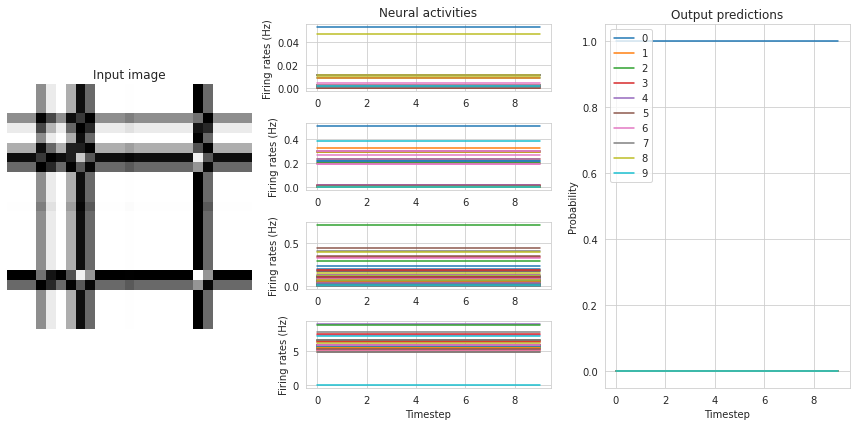

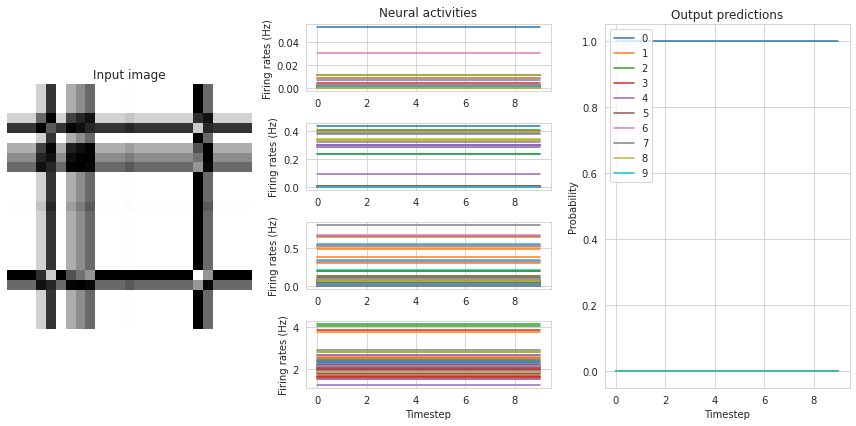

In [ ]:
mean_rates = run_network(activation=nengo.RectifiedLinear(), n_steps=10)


Test accuracy: 80.00%
"to-spikes" mean firing rate (example 0): 33.3
"conv0" mean firing rate (example 0): 42.4
"conv1" mean firing rate (example 0): 90.1
"dense0" mean firing rate (example 0): 10408.0
"to-spikes" mean firing rate (example 1): 33.3
"conv0" mean firing rate (example 1): 42.0
"conv1" mean firing rate (example 1): 105.7
"dense0" mean firing rate (example 1): 8272.3


array([  33.333336,   42.192436,   97.91017 , 9340.166   ], dtype=float32)

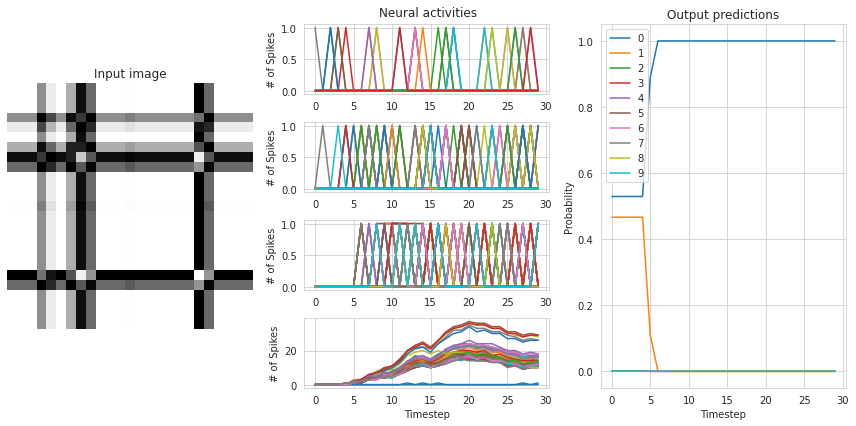

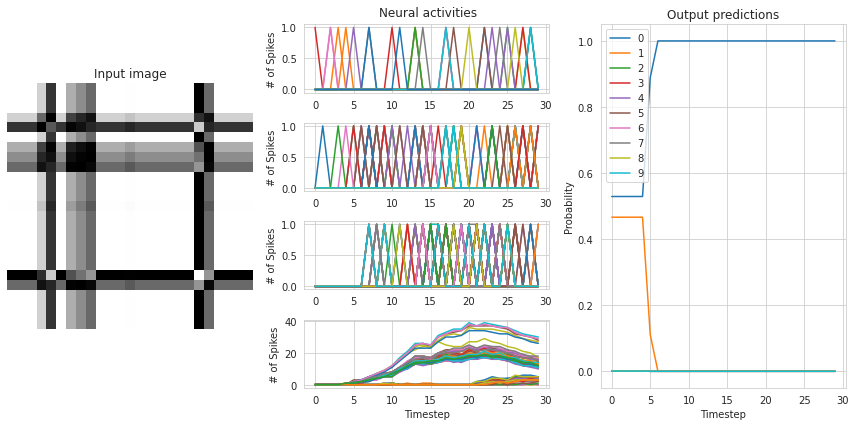

In [ ]:
run_network(
    activation=nengo.SpikingRectifiedLinear(),
    scale_firing_rates=100,
    synapse=0.005,
)